## <u>Objective</u><br/><br/>To build a multiple linear regression model for the prediction of demand for shared bikes<br/>
-------------------------------------------------------------------------------------------------------------------------------


## 1) Importing the relevant libraries for Data loading, Data cleaning , Data analysis and Data plotting

In [1]:
import pandas as pd
import random
import chardet
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
%matplotlib inline

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

--------------------------------------------------------------------------------------------------------------------------------

## 2) Data Understanding

In [2]:
#check the encoding and read the dataset with proper encoding
with open("day.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(4000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


## 2.1) Reading data from csv file using pandas

In [3]:
#Reading the dataset with proper encoding
#dataset is the variable to store the data in csv
dataset = pd.read_csv("day.csv", encoding='UTF-8')

In [4]:
#Look for top 5 rows and bottom 5 rows in the data set for a basic check
dataset.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#To check the rows and columns read are same as present in excel or not 
dataset.shape

(730, 16)

In [6]:
#To check the data type and Null values 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


From the above we see that there is no Null values present <br/><br/> some more ways for cross checking Null values are follows

In [7]:
# Determine the columnwise percentage of Null values 
print(round(100*(dataset.isnull().sum()/len(dataset.index)), 2))

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


In [8]:
dataset.isnull().values.any()

False

In [9]:
#analyse the data like mean median column wise
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### The column Instant is record index and thus can be dropped

In [10]:
dataset = dataset.drop('instant', axis=1) 

In [11]:
dataset.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### So the number of columns has been reduced to 15 from 16

In [12]:
#Check the number of unique values in the season column
dataset['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

### 4 types of seasons are present and we need to convert it into categorical variable for better analysis

1.spring<br/> 2.summer<br/> 3.fall<br/> 4.winter<br/>

Mapping the corresponding value in the column "season" as shown below

In [13]:
#Setting the value of 1 as 'spring'
dataset.season[dataset.season == 1] = 'spring'

<ipython-input-13-a1049c9bb3d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.season[dataset.season == 1] = 'spring'


In [14]:
#Setting the values of  as 'summer'
dataset.season[dataset.season == 2] = 'summer'

In [15]:
#Setting the values of  as 'fall'
dataset.season[dataset.season == 3] = 'fall'

In [16]:
#Setting the values of  as 'winter'
dataset.season[dataset.season == 4] = 'winter'

In [17]:
dataset['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [18]:
dataset['season'] = dataset['season'].astype('str')

In [19]:
dataset['season']

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

### Mapping the months as follows:-

1 :- Jan
2 :- Feb
3 :- Mar
4 :- Apr
5 :- May
.
.
.
12:- Dec

In [20]:
#Setting the values in the column "mnth" to cooresponding month value 

m = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(len(m)):
    dataset.mnth[dataset.mnth == i+1] = m[i]

<ipython-input-20-5a02a93b30f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.mnth[dataset.mnth == i+1] = m[i]


In [21]:
dataset.mnth.value_counts()

Jul    62
May    62
Oct    62
Jan    62
Aug    62
Dec    62
Mar    62
Sep    60
Nov    60
Apr    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [22]:
dataset['mnth'] = dataset['mnth'].astype('str')

In [23]:
dataset.mnth.value_counts()

Jul    62
May    62
Oct    62
Jan    62
Aug    62
Dec    62
Mar    62
Sep    60
Nov    60
Apr    60
Jun    60
Feb    56
Name: mnth, dtype: int64

### Categorising yr column <br/> 0:-   2018 <br/> 1:-   2019

In [24]:
#Setting the values of  0 in column yr as '2018'
dataset.yr[dataset.yr == 0] = '2018'

<ipython-input-24-9b14a4d87f23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.yr[dataset.yr == 0] = '2018'


In [25]:
#Setting the values of  1 in column yr as '2019'
dataset.yr[dataset.yr == 1] = '2019'

In [26]:
#Setting the values of  1 in column holiday as 'Holiday'
dataset.holiday[dataset.holiday == 1] = 'Holiday'

<ipython-input-26-bcc00db6cb25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.holiday[dataset.holiday == 1] = 'Holiday'


In [27]:
#Setting the values of  0 in column holiday as 'Non Holiday'
dataset.holiday[dataset.holiday == 0] = 'Non Holiday'

In [28]:
dataset.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,2018,Jan,Non Holiday,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,2018,Jan,Non Holiday,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,2018,Jan,Non Holiday,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,2018,Jan,Non Holiday,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,2018,Jan,Non Holiday,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [29]:
#Setting the values of  0 in column holiday as 'Non Holiday'
dataset.workingday[dataset.workingday == 1] = 'working day'

<ipython-input-29-7eac80f50e22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.workingday[dataset.workingday == 1] = 'working day'


In [30]:
dataset.workingday[dataset.workingday == 0] = 'Non working day'

In [31]:
dataset.weekday.value_counts()

0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

### 1st Jan 2018 is Monday and its date value in column "weekday" is 6.<br/>  Accordingly assigning the corresponding day name for the other values in column "weekday" as follows:-<br/>6 = Mon<br/>0 = Tue<br/>1 = Wed<br/> 2 = Thurs<br/>3= Fri<br/>4 = Sat<br/>5 = Sun

In [32]:
#Assigining the corresponding name to the numveric values in column "weekday" as follows
m = ['Tue','Wed','Thurs','Fri','Sat','Sun','Mon']
for i in range(len(m)):
    dataset.weekday[dataset.weekday == i] = m[i]

<ipython-input-32-c90c3751af61>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.weekday[dataset.weekday == i] = m[i]


In [33]:
dataset.weekday.value_counts()

Wed      105
Mon      105
Tue      105
Sat      104
Thurs    104
Sun      104
Fri      103
Name: weekday, dtype: int64

In [34]:
#function for weather conversion
def WeatherSit_Conversion(x):
  if x == 1:
    return "clear_paritally_cloudy"
  if x == 2:
    return "mist_cloudy"
  if x == 3:
    return "light_snow_rain_thunderstrom"
  if x == 4:
    return "hevy_snow_rain_thunderstrom_mist"

In [35]:
#drop unneccessary variables which are not going to add any value to the model.
dataset.drop(columns=['dteday','casual','registered'],axis=1,inplace = True)

In [36]:
# apply weahter conversion function to variable
dataset['weathersit'] = dataset['weathersit'].apply(WeatherSit_Conversion)

In [37]:
#Check whether the mapping in the column "weathersit" has been implemented or not
dataset.weathersit

0                 mist_cloudy
1                 mist_cloudy
2      clear_paritally_cloudy
3      clear_paritally_cloudy
4      clear_paritally_cloudy
                ...          
725               mist_cloudy
726               mist_cloudy
727               mist_cloudy
728    clear_paritally_cloudy
729               mist_cloudy
Name: weathersit, Length: 730, dtype: object

## Generate the descriptive statistics to get the basic quantitative information about the features of the data set.


In [38]:
#Review statistical parameter for each column
dataset.describe(include='all')

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730,730,730,730,730,730,730,730.000000,730.000000,730.000000,730.000000,730.000000
unique,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN
top,fall,2018,Jul,Non Holiday,Wed,working day,clear_paritally_cloudy,NaN,NaN,NaN,NaN,NaN
freq,188,365,62,709,105,499,463,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.319259,23.726322,62.765175,12.763620,4508.006849
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.506729,8.150308,14.237589,5.195841,1936.011647
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,22.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.880615,30.445775,72.989575,15.625589,5966.000000


In [39]:
# Considering Categorical Variables
var_categorical = dataset.dtypes[dataset.dtypes == "object"]
var_categorical

season        object
yr            object
mnth          object
holiday       object
weekday       object
workingday    object
weathersit    object
dtype: object

In [40]:
# checking the top five records of categorical columns
dataset[var_categorical.index].head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,2018,Jan,Non Holiday,Mon,Non working day,mist_cloudy
1,spring,2018,Jan,Non Holiday,Tue,Non working day,mist_cloudy
2,spring,2018,Jan,Non Holiday,Wed,working day,clear_paritally_cloudy
3,spring,2018,Jan,Non Holiday,Thurs,working day,clear_paritally_cloudy
4,spring,2018,Jan,Non Holiday,Fri,working day,clear_paritally_cloudy


In [41]:
dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,Non Holiday,Mon,Non working day,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,Non Holiday,Tue,Non working day,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,Non Holiday,Wed,working day,clear_paritally_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,Non Holiday,Thurs,working day,clear_paritally_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,Non Holiday,Fri,working day,clear_paritally_cloudy,9.305237,11.46350,43.6957,12.522300,1600


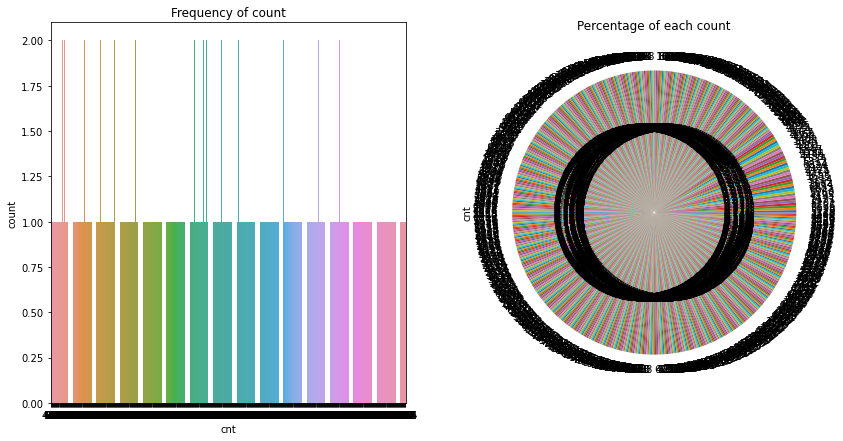

In [42]:
#Visualizing the Target Column i.e cnt
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='cnt',data=dataset,ax=axs[0])
axs[0].set_title("Frequency of count")
dataset.cnt.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each count")
plt.show()

c:\users\91824\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of season vs cnt')

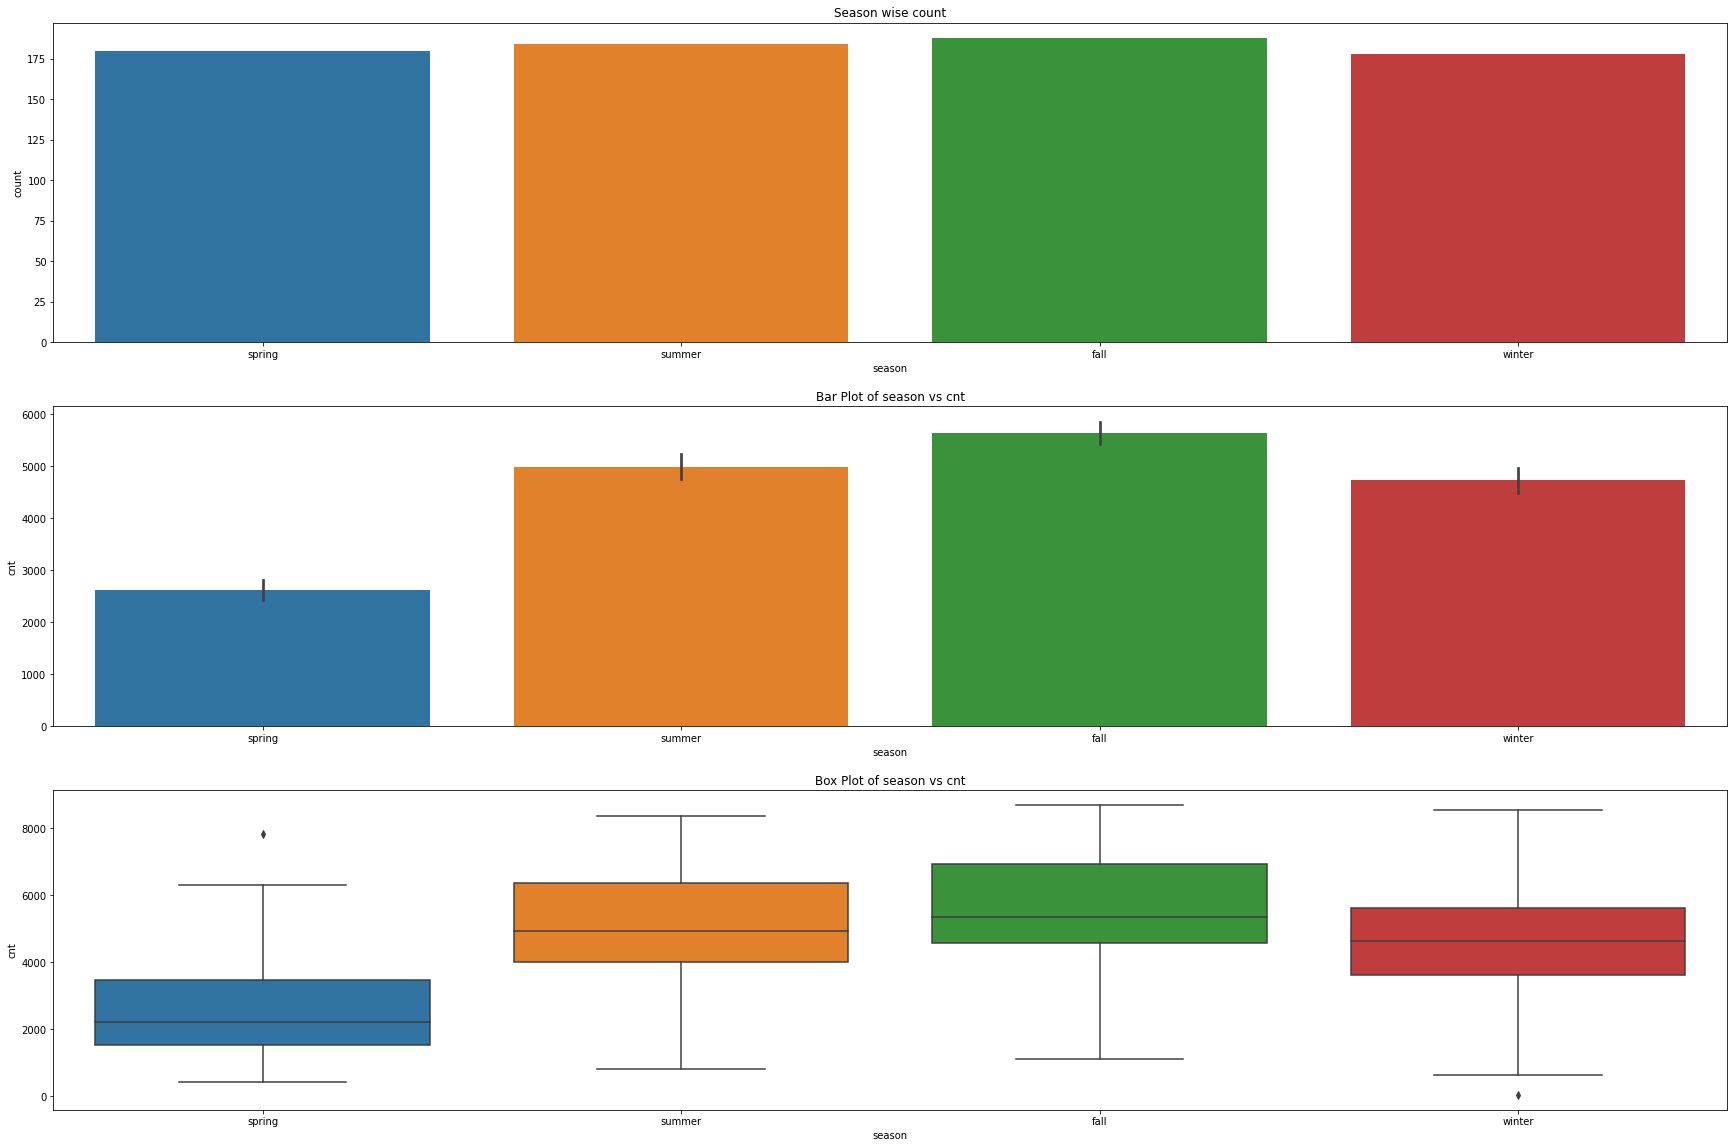

In [43]:
# visualization  for "Season"
plt.figure(figsize=(30,20))
plt.subplot(311)
sns.countplot(dataset['season'])
plt.title("Season wise count")

#Bar plot 
plt.subplot(312)
sns.barplot(x='season', y='cnt', data = dataset)
plt.title("Bar Plot of season vs cnt")

#Box plot 
plt.subplot(313)
sns.boxplot(x='season', y='cnt', data = dataset)
plt.title("Box Plot of season vs cnt")

## Observations:- The demand for the bike seems to be high during the fall season


In [44]:
dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,Non Holiday,Mon,Non working day,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,Non Holiday,Tue,Non working day,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,Non Holiday,Wed,working day,clear_paritally_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,Non Holiday,Thurs,working day,clear_paritally_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,Non Holiday,Fri,working day,clear_paritally_cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [45]:
# Unique value for mnth
dataset['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

c:\users\91824\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of mnth vs cnt')

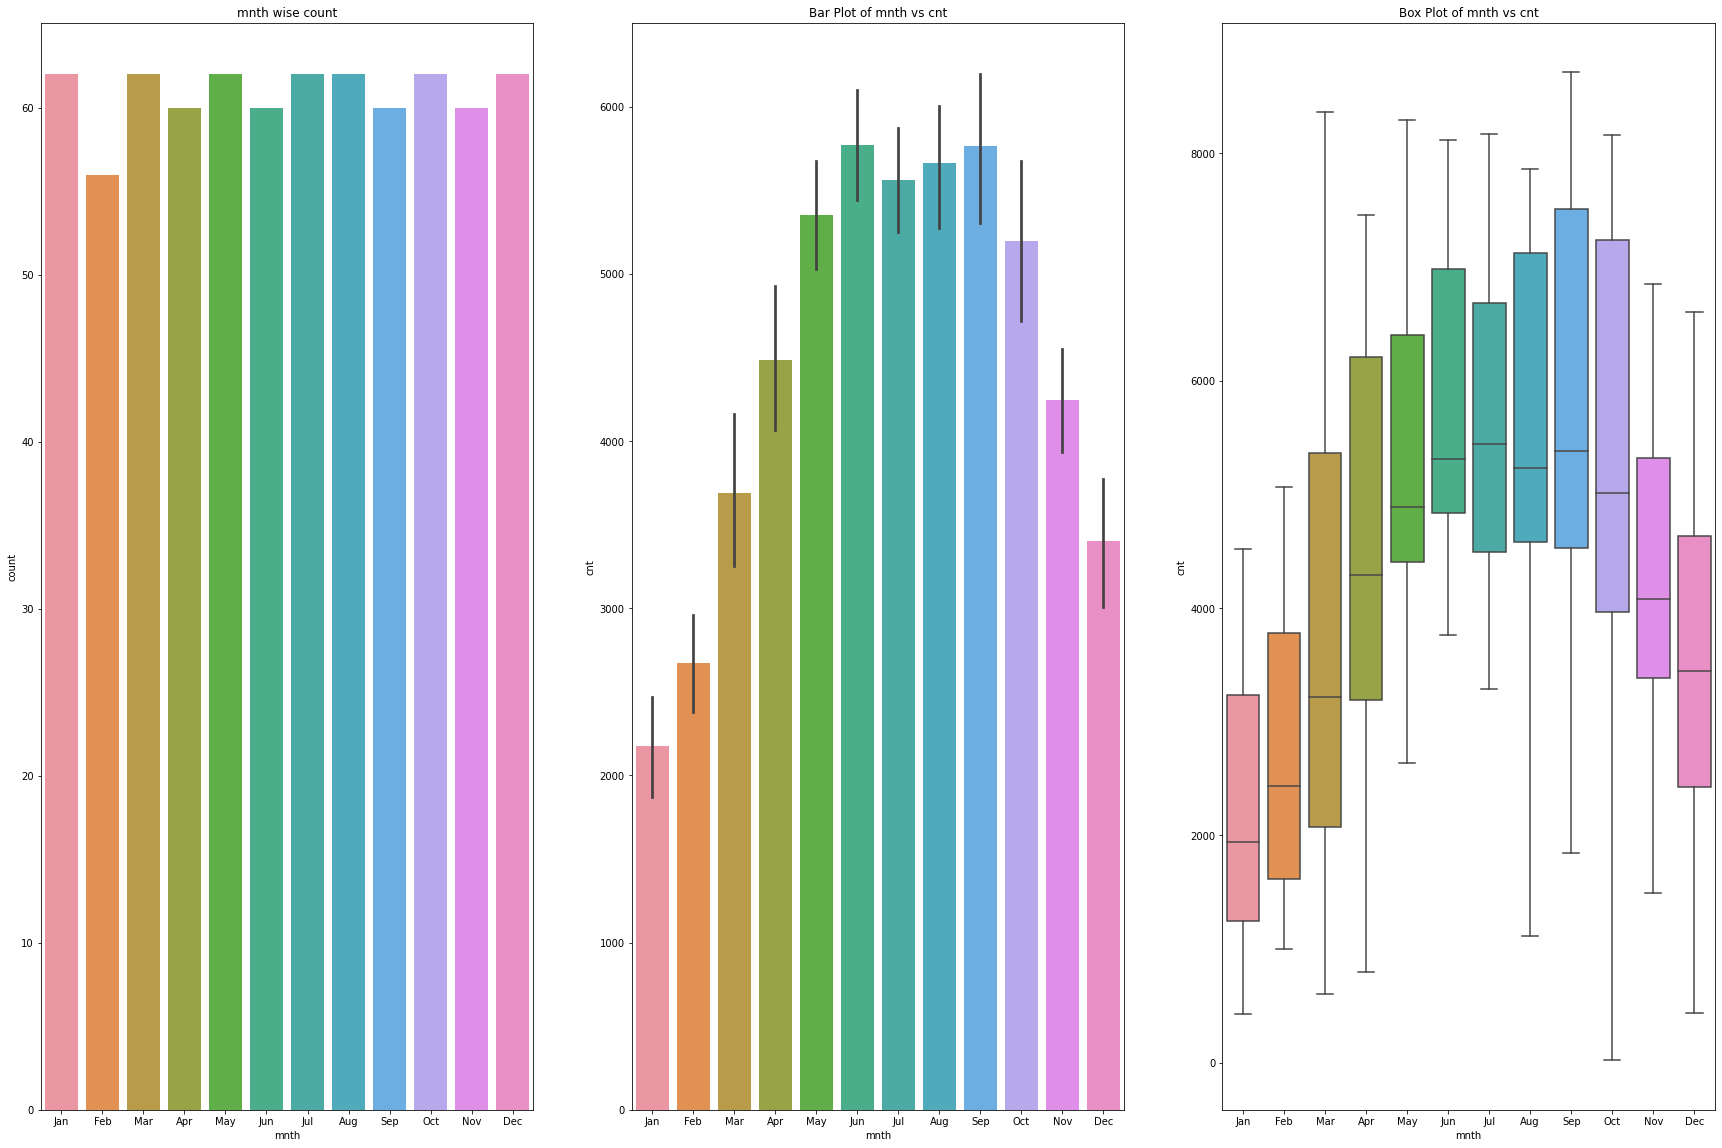

In [46]:
# visualization  for "mnth"
plt.figure(figsize=(30,20))
plt.subplot(131)
sns.countplot(dataset['mnth'])
plt.title("mnth wise count")

#Bar plot 
plt.subplot(132)
sns.barplot(x='mnth', y='cnt', data = dataset)
plt.title("Bar Plot of mnth vs cnt")

#Box plot 
plt.subplot(133)
sns.boxplot(x='mnth', y='cnt', data = dataset)
plt.title("Box Plot of mnth vs cnt")

In [47]:
# Unique value of "weekday"
dataset['weekday'].unique()

array(['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], dtype=object)

c:\users\91824\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of weekday vs cnt')

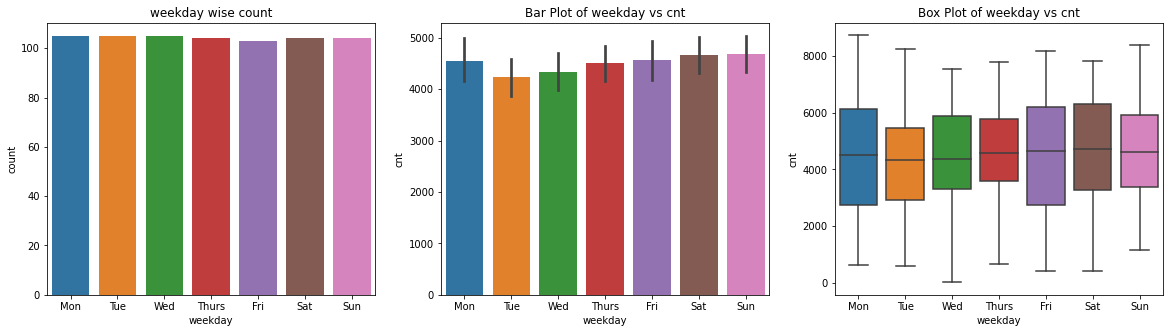

In [48]:
# visualization  for "weekday"
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(dataset['weekday'])
plt.title("weekday wise count")

#Bar plot 
plt.subplot(132)
sns.barplot(x='weekday', y='cnt', data = dataset)
plt.title("Bar Plot of weekday vs cnt")

#Box plot 
plt.subplot(133)
sns.boxplot(x='weekday', y='cnt', data = dataset)
plt.title("Box Plot of weekday vs cnt")

In [49]:
# Unique value of "workingday"
dataset['workingday'].unique()

array(['Non working day', 'working day'], dtype=object)

c:\users\91824\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of workingday vs cnt')

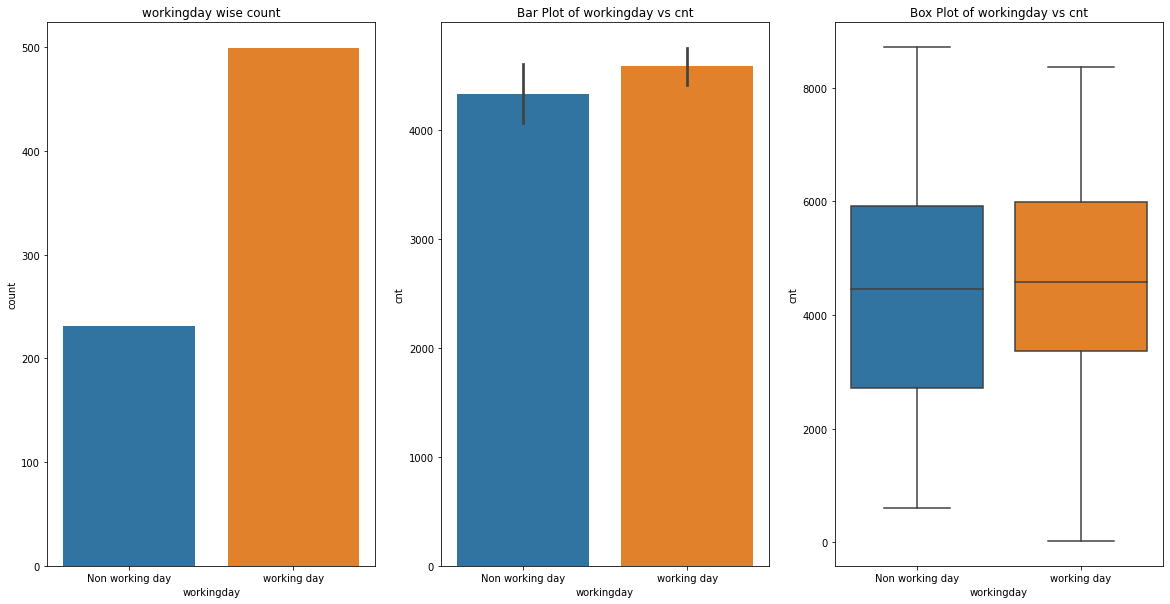

In [50]:
# visualization  for "workingday"
plt.figure(figsize=(20,10))
plt.subplot(131)
sns.countplot(dataset['workingday'])
plt.title("workingday wise count")

#Bar plot 
plt.subplot(132)
sns.barplot(x='workingday', y='cnt', data = dataset)
plt.title("Bar Plot of workingday vs cnt")

#Box plot 
plt.subplot(133)
sns.boxplot(x='workingday', y='cnt', data = dataset)
plt.title("Box Plot of workingday vs cnt")

In [51]:
# Unique value of "weathersit"
dataset['weathersit'].unique()

array(['mist_cloudy', 'clear_paritally_cloudy',
       'light_snow_rain_thunderstrom'], dtype=object)

c:\users\91824\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of weathersit vs cnt')

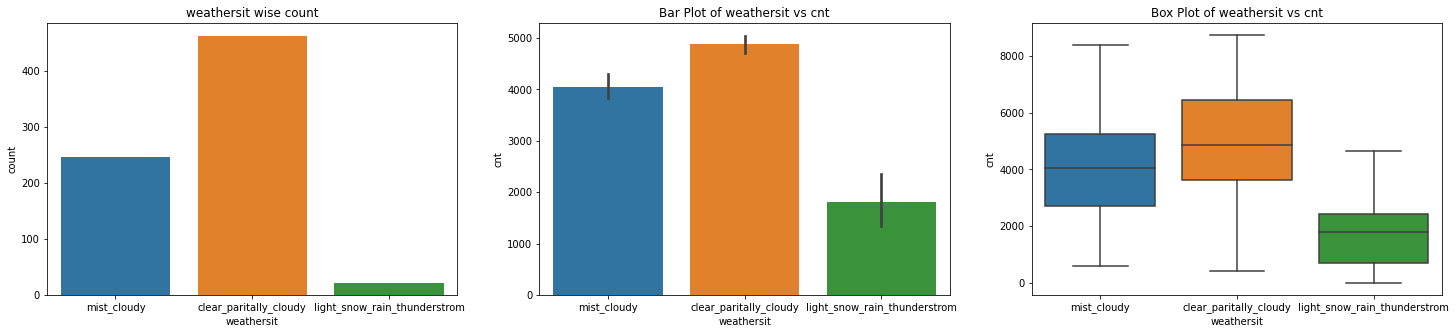

In [52]:
# visualization  for "weathersit"
plt.figure(figsize=(25,5))
plt.subplot(131)
sns.countplot(dataset['weathersit'])
plt.title("weathersit wise count")

#Bar plot 
plt.subplot(132)
sns.barplot(x='weathersit', y='cnt', data = dataset)
plt.title("Bar Plot of weathersit vs cnt")

#Box plot 
plt.subplot(133)
sns.boxplot(x='weathersit', y='cnt', data = dataset)
plt.title("Box Plot of weathersit vs cnt")

In [53]:
# Unique value of "holiday"
dataset['holiday'].unique()

array(['Non Holiday', 'Holiday'], dtype=object)

c:\users\91824\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of holiday vs cnt')

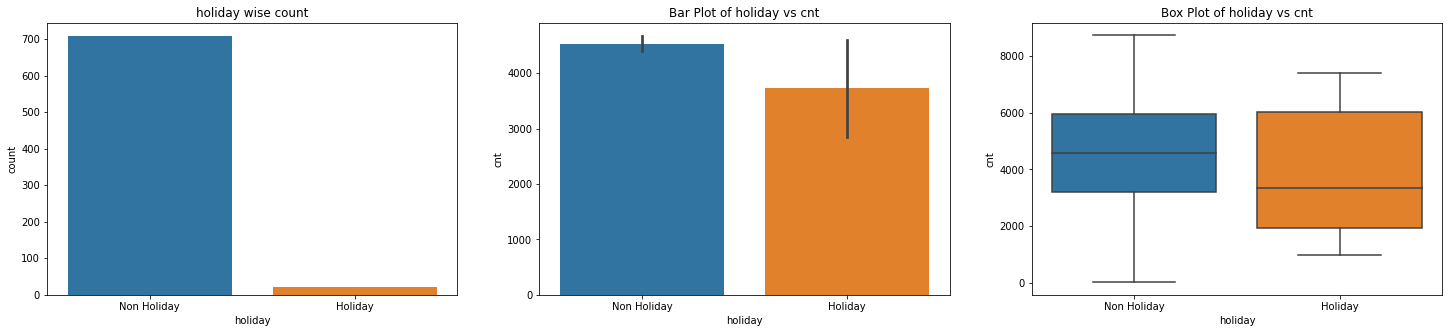

In [54]:
# visualization  for "holiday"
plt.figure(figsize=(25,5))
plt.subplot(131)
sns.countplot(dataset['holiday'])
plt.title("holiday wise count")

#Bar plot 
plt.subplot(132)
sns.barplot(x='holiday', y='cnt', data = dataset)
plt.title("Bar Plot of holiday vs cnt")

#Box plot 
plt.subplot(133)
sns.boxplot(x='holiday', y='cnt', data = dataset)
plt.title("Box Plot of holiday vs cnt")

In [55]:
# Considering Numerical features
var_numeric = dataset.dtypes[dataset.dtypes != "object"]
var_numeric

temp         float64
atemp        float64
hum          float64
windspeed    float64
cnt            int64
dtype: object

In [56]:
dataset[var_numeric.index].head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


In [57]:
# Correlation Matrix
dataset[var_numeric.index].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


(5.5, -0.5)

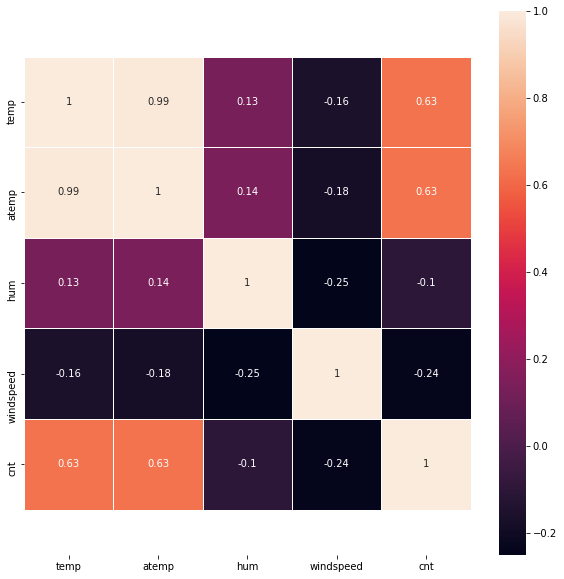

In [58]:
# Heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(round(dataset[var_numeric.index].corr(),2), annot = True,linewidth=0.5)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

<Figure size 720x360 with 0 Axes>

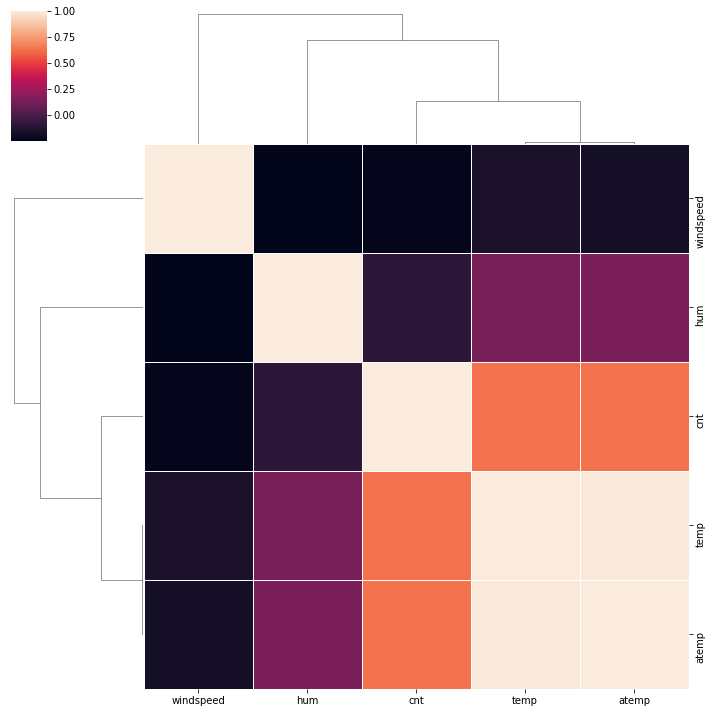

In [59]:
# Clustermap
plt.figure(figsize=(10,5))
sns.clustermap(dataset[var_numeric.index].corr(), linewidth=0.5)

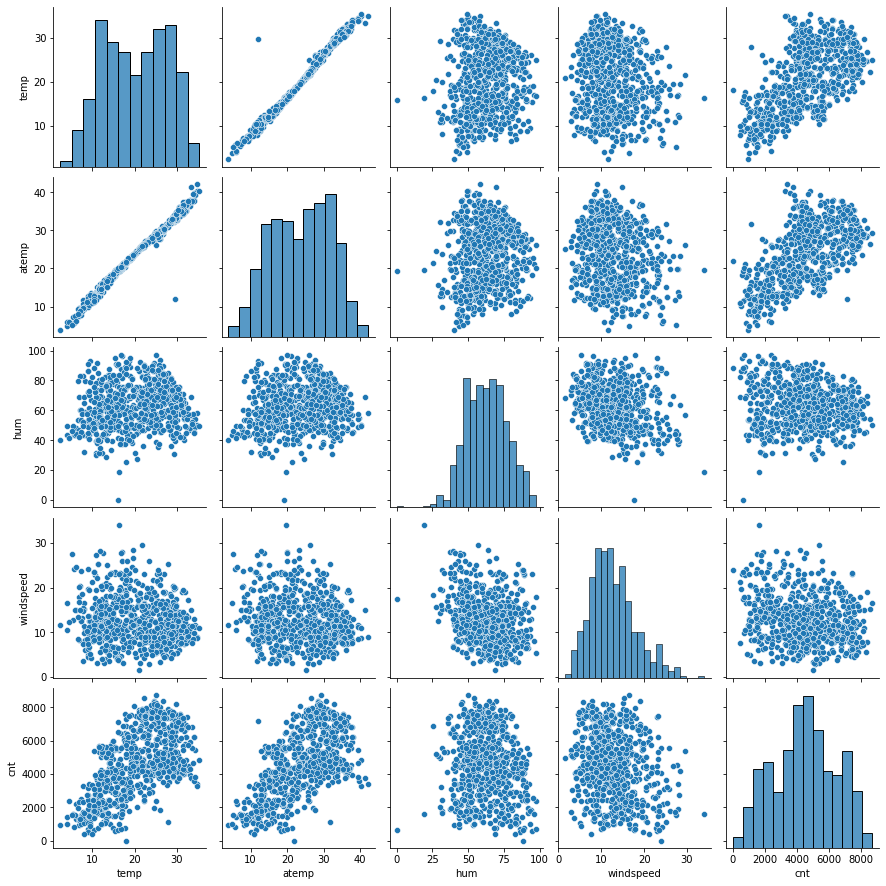

In [60]:
sns.pairplot(dataset[var_numeric.index])

In [61]:
# As "cnt" is the target variable, therefore, it needs to be removed from the numeric feature variable list
var_numeric = var_numeric.drop('cnt', axis=0)
var_numeric

temp         float64
atemp        float64
hum          float64
windspeed    float64
dtype: object

<Figure size 3600x720 with 0 Axes>

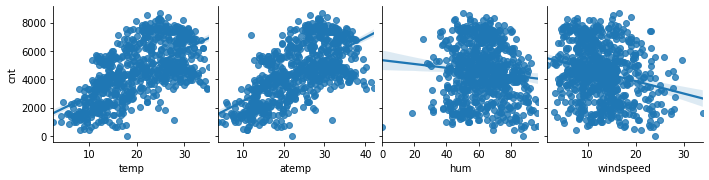

In [62]:
plt.figure(figsize=(50,10))
sns.pairplot(x_vars=var_numeric.index, y_vars = 'cnt', data = dataset, kind = 'reg')

### From the above it is evident that varibale 'hum' and 'windspeed' are having negative correlation with 'cnt'

c:\users\91824\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\91824\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\91824\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

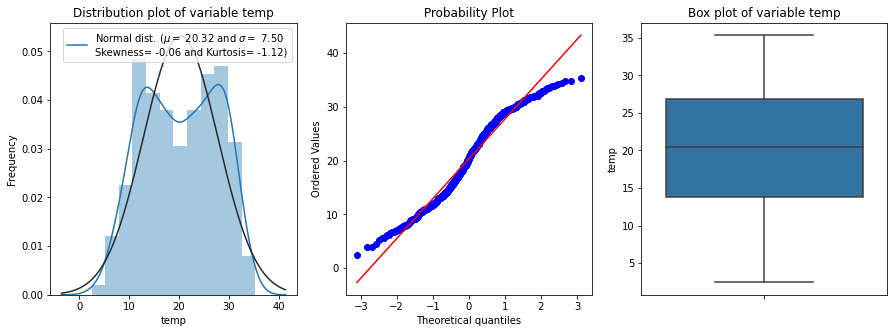

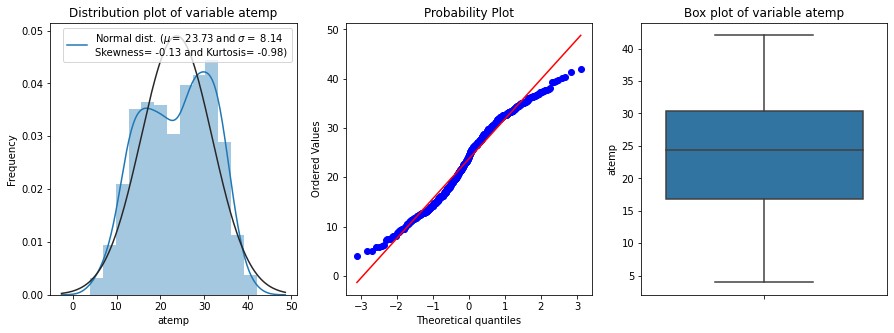

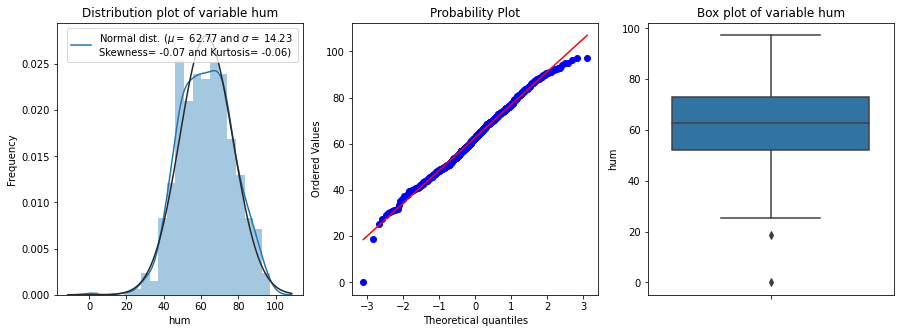

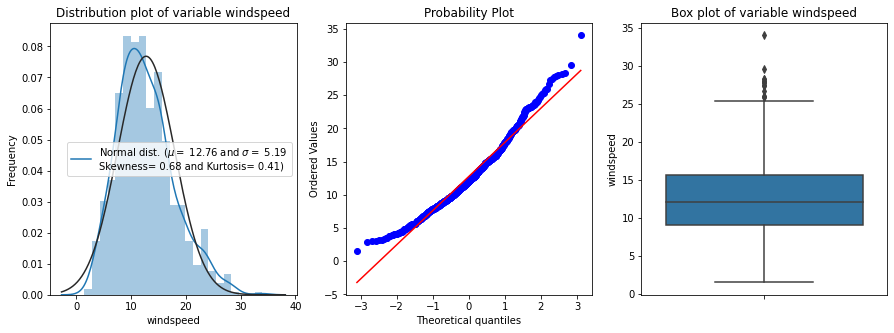

In [63]:
#Now plot the distribution of feature variables
from scipy.stats import norm
from scipy import stats

def transformation_plot(col_name):
    
    '''
    Create a function to plot the distribution plot and the QQ-plot
    '''
    #Check the new distribution 
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    sns.distplot(dataset[col_name], fit=norm)

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(dataset[col_name])
    #skewness and kurtosis
    skew = dataset[col_name].skew()
    kurt = dataset[col_name].kurt()
    
    #print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} \nSkewness= {:.2f} and Kurtosis= {:.2f})'.format(mu, sigma, skew, kurt)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Distribution plot of variable ' + col_name)

    #Get also the QQ-plot
    plt.subplot(132)
    res = stats.probplot(dataset[col_name], plot=plt)
    
    # Get the Box Plot
    plt.subplot(133)
    sns.boxplot(y = dataset[col_name])
    plt.title("Box plot of variable " + col_name)


# Checking for Distribution Plot, QQ-Plot and Box-Plot for the features
for i in var_numeric.index:
    transformation_plot(i)

c:\users\91824\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


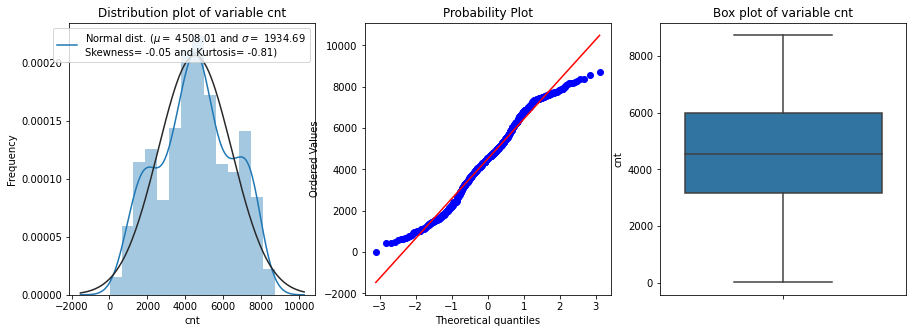

In [64]:
# Checking for Distribution Plot, QQ-Plot and Box Plot for the target variable "cnt"
transformation_plot('cnt')

## Creating Dummy variables for categorical columns


In [65]:
# Considering Categorical Variables

var_categorical

season        object
yr            object
mnth          object
holiday       object
weekday       object
workingday    object
weathersit    object
dtype: object

In [66]:
#create dummy variables for categorical columns
dataset= pd.get_dummies(dataset,columns=['season','mnth','weekday','weathersit','yr','holiday','workingday'],drop_first= True)

In [67]:
dataset.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,...,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_light_snow_rain_thunderstrom,weathersit_mist_cloudy,yr_2019,holiday_Non Holiday,workingday_working day
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [68]:
dataset.shape

(730, 30)

In [69]:
dataset.dtypes

temp                                       float64
atemp                                      float64
hum                                        float64
windspeed                                  float64
cnt                                          int64
season_spring                                uint8
season_summer                                uint8
season_winter                                uint8
mnth_Aug                                     uint8
mnth_Dec                                     uint8
mnth_Feb                                     uint8
mnth_Jan                                     uint8
mnth_Jul                                     uint8
mnth_Jun                                     uint8
mnth_Mar                                     uint8
mnth_May                                     uint8
mnth_Nov                                     uint8
mnth_Oct                                     uint8
mnth_Sep                                     uint8
weekday_Mon                    

In [70]:
dataset.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed',
       'weathersit_light_snow_rain_thunderstrom', 'weathersit_mist_cloudy',
       'yr_2019', 'holiday_Non Holiday', 'workingday_working day'],
      dtype='object')

In [71]:
dataset.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,...,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_light_snow_rain_thunderstrom,weathersit_mist_cloudy,yr_2019,holiday_Non Holiday,workingday_working day
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


# Train-Test Split and Feature scaling

In [72]:
'''Splitting the dataset into train and test
We specify this so that the train and test data set always have the same rows, respectively'''
df_train,df_test = train_test_split(dataset,train_size=0.7, test_size=0.3,random_state =100,)

In [73]:
#list of continuous variable
cntous_var_list = ['temp','atemp','hum','windspeed','cnt']

In [74]:
# scaling of continous variables
scalar= StandardScaler()
df_train[cntous_var_list]= scalar.fit_transform(df_train[cntous_var_list])

<ipython-input-74-71297f181797>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[cntous_var_list]= scalar.fit_transform(df_train[cntous_var_list])
c:\users\91824\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


### Verifying the Train-Test data split

In [75]:
df_train.head()
df_train.shape

(510, 30)

In [76]:
df_train.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,...,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_light_snow_rain_thunderstrom,weathersit_mist_cloudy,yr_2019,holiday_Non Holiday,workingday_working day
count,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,-2.385891e-16,4.231909e-16,-3.831358e-16,-2.263984e-16,-5.224579e-17,0.243137,0.245098,0.24902,0.096078,0.084314,...,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137,0.507843,0.974510,0.676471
std,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.429398,0.430568,0.43287,0.294988,0.278131,...,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223,0.500429,0.157763,0.468282
min,-2.381246e+00,-2.417741e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.749555e-01,-8.526058e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.443562e-02,6.514277e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,8.773604e-01,8.269866e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,2.050938e+00,2.295305e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
df_test.head()
df_test.shape

(219, 30)

In [78]:
df_test.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,...,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_light_snow_rain_thunderstrom,weathersit_mist_cloudy,yr_2019,holiday_Non Holiday,workingday_working day
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,20.815737,24.255828,61.961883,12.600130,4546.981735,0.255708,0.264840,0.232877,0.059361,0.086758,...,0.164384,0.178082,0.164384,0.146119,0.127854,0.027397,0.319635,0.479452,0.963470,0.698630
std,7.689600,8.299641,14.456669,4.984858,1898.633630,0.437258,0.442259,0.423633,0.236840,0.282125,...,0.371472,0.383458,0.371472,0.354034,0.334692,0.163612,0.467403,0.500722,0.188034,0.459904
min,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.093750,17.085500,51.166700,9.021282,3303.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,20.807500,24.873150,60.916700,12.167200,4579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,27.401653,31.155725,72.192050,15.395629,5869.500000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
df_train.shape

(510, 30)

In [80]:
# split target variable and independent variables
y_train= df_train.pop('cnt')
X_train  = df_train
X_train.shape

(510, 29)

In [81]:
#simillar operation for test set also
y_test = df_test.pop('cnt')
X_test = df_test
X_test.shape

(219, 29)

In [82]:
# adding constant
import statsmodels.api  as sm
X_train =  sm.add_constant(X_train)

# Building Model

In [83]:
#Buliding model
lm = sm.OLS(y_train,X_train).fit()

In [84]:
# print summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          8.42e-181
Time:                        22:48:22   Log-Likelihood:                -234.14
No. Observations:                 510   AIC:                             526.3
Df Residuals:                     481   BIC:                             649.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [85]:
def checkVIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [86]:
checkVIF(X_train)

c:\users\91824\appdata\local\programs\python\python38\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
29,workingday_working day,inf
19,weekday_Mon,inf
28,holiday_Non Holiday,inf
23,weekday_Tue,inf
0,const,112.90
1,temp,67.12
2,atemp,56.09
5,season_spring,10.80
7,season_winter,9.52
6,season_summer,8.31


In [87]:
# Build model using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
rfe1= RFE(lm,10)
rfe1.fit(X_train,y_train)


print(rfe1.support_)           
print(rfe1.ranking_)  

[False  True False False False  True False  True False False False False
  True False False False False False  True  True False False False False
 False  True  True  True  True False]
[21  1 15 10  8  1  7  1 11  4  6  5  1 19 20  9  3 17  1  1 18 16 14 12
 13  1  1  1  1  2]


c:\users\91824\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [88]:
# addingconstant
import statsmodels.api as sm
col1= X_train.columns[rfe1.support_]
X_train_RFE1= X_train[col1]
X_train_RFE1 = sm.add_constant(X_train_RFE1)
X_train_RFE1.head()

,const,temp,season_spring,season_winter,mnth_Jul,mnth_Sep,weekday_Mon,weathersit_light_snow_rain_thunderstrom,weathersit_mist_cloudy,yr_2019,holiday_Non Holiday
653,1.0,-0.121335,0,1,0,0,0,0,0,1,1
576,1.0,1.231731,0,0,1,0,0,0,0,1,1
426,1.0,-0.420478,1,0,0,0,1,0,1,1,1
728,1.0,-1.294913,1,0,0,0,0,0,0,1,1
482,1.0,-0.627580,0,0,0,0,1,0,1,1,1


In [89]:
#Building Model
lm1 = sm.OLS(y_train,X_train_RFE1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.31e-180
Time:                        22:48:22   Log-Likelihood:                -281.77
No. Observations:                 510   AIC:                             585.5
Df Residuals:                     499   BIC:                             632.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [90]:
#Checking VIF
checkVIF(X_train_RFE1)

,Features,VIF
0,const,44.48
1,temp,2.79
2,season_spring,2.54
3,season_winter,1.69
4,mnth_Jul,1.28
5,mnth_Sep,1.10
7,weathersit_light_snow_rain_thunderstrom,1.04
8,weathersit_mist_cloudy,1.04
9,yr_2019,1.02
10,holiday_Non Holiday,1.02


In [91]:
#removing  variable 'weekday_Mon' as p-value is more than 0.05
X_train_RFE1.drop('weekday_Mon',axis=1,inplace=True)

In [92]:
X_train_RFE1.head()

,const,temp,season_spring,season_winter,mnth_Jul,mnth_Sep,weathersit_light_snow_rain_thunderstrom,weathersit_mist_cloudy,yr_2019,holiday_Non Holiday
653,1.0,-0.121335,0,1,0,0,0,0,1,1
576,1.0,1.231731,0,0,1,0,0,0,1,1
426,1.0,-0.420478,1,0,0,0,0,1,1,1
728,1.0,-1.294913,1,0,0,0,0,0,1,1
482,1.0,-0.627580,0,0,0,0,0,1,1,1


In [93]:
#Building model
lm1 = sm.OLS(y_train,X_train_RFE1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.16e-181
Time:                        22:48:22   Log-Likelihood:                -282.79
No. Observations:                 510   AIC:                             585.6
Df Residuals:                     500   BIC:                             627.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

###  R-squared is 0.823 and Adj. R-squared is 0.819
### (1) Equation = -0.7476 + ((temp)(-0.4738)) + ((season_spring)(-0.4934)) + ((season_winter)(0.2486)) + ((mnth_Jul)(-0.3065))+((mnth_Sep)(0.2932)) + ((weathersit_light_snow_rain_thunderstrom)(-1.3382)) + ((weathersit_mist_cloudy)(-0.3546)) +((yr_2019) (1.0386)) + ((holiday_Non Holiday) (0.4506))

### (2) p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.***

### (3) variables such as temp, season_winter, mnth_Sep are strong independent varibales according to the above model.



In [94]:
#Checking VIF
checkVIF(X_train_RFE1)

,Features,VIF
0,const,44.48
1,temp,2.79
2,season_spring,2.54
3,season_winter,1.69
4,mnth_Jul,1.28
5,mnth_Sep,1.10
6,weathersit_light_snow_rain_thunderstrom,1.04
7,weathersit_mist_cloudy,1.04
8,yr_2019,1.02
9,holiday_Non Holiday,1.02


## Building Model other ways: Considering all features

In [95]:
# split target variable and independent variables
X_train_o  = df_train

# simillar operation for test set also
X_test_o = df_test

# y_train & y_test is same as before where target variable has been popped from df_train & df_test already

In [96]:
# Model for all features
lm=LinearRegression()
lm.fit(X_train_o,y_train)

y_pred_test=lm.predict(X_test_o)
y_pred_train=lm.predict(X_train_o)

In [97]:
## Evaluation metrics

#Rsquare
from sklearn.metrics import r2_score

print('R-sqaure on train data: {:.2f}'.format(r2_score(y_true=y_train, y_pred=y_pred_train)))
print('R-sqaure on test data: {:.2f}'.format(r2_score(y_true=y_test, y_pred=y_pred_test)))

#Standard error/RMSE
error_train=y_pred_train-y_train
error_test=y_pred_test-y_test

print('RMSE on train data: {:.2f}'.format(((error_train**2).mean())**0.5))
print('RMSE on test data: {:.2f}'.format(((error_test**2).mean())**0.5))

R-sqaure on train data: 0.85
R-sqaure on test data: -5.75
RMSE on train data: 0.38
RMSE on test data: 4923.11
